<a href="https://colab.research.google.com/github/nitishxthakur/DataLab/blob/main/Student_Result_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [17]:
df=pd.read_csv('/content/Student_Score_Data.csv')

In [25]:
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [20]:
df=df.drop("Unnamed: 0", axis=1)

In [21]:
df.shape

(30641, 14)

In [22]:
df.describe()

,NrSiblings,MathScore,ReadingScore,WritingScore
count,29069.000000,30641.000000,30641.000000,30641.000000
mean,2.145894,66.558402,69.377533,68.418622
std,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,10.000000,4.000000
25%,1.000000,56.000000,59.000000,58.000000
50%,2.000000,67.000000,70.000000,69.000000
75%,3.000000,78.000000,80.000000,79.000000
max,7.000000,100.000000,100.000000,100.000000


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               30641 non-null  object 
 1   EthnicGroup          28801 non-null  object 
 2   ParentEduc           28796 non-null  object 
 3   LunchType            30641 non-null  object 
 4   TestPrep             28811 non-null  object 
 5   ParentMaritalStatus  29451 non-null  object 
 6   PracticeSport        30010 non-null  object 
 7   IsFirstChild         29737 non-null  object 
 8   NrSiblings           29069 non-null  float64
 9   TransportMeans       27507 non-null  object 
 10  WklyStudyHours       29686 non-null  object 
 11  MathScore            30641 non-null  int64  
 12  ReadingScore         30641 non-null  int64  
 13  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 3.3+ MB


In [24]:
df.isnull().sum()

,0
Gender,0
EthnicGroup,1840
ParentEduc,1845
LunchType,0
TestPrep,1830
ParentMaritalStatus,1190
PracticeSport,631
IsFirstChild,904
NrSiblings,1572
TransportMeans,3134


In [30]:
df['WklyStudyHours']=df['WklyStudyHours'].str.replace('05-oct','5-10')
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


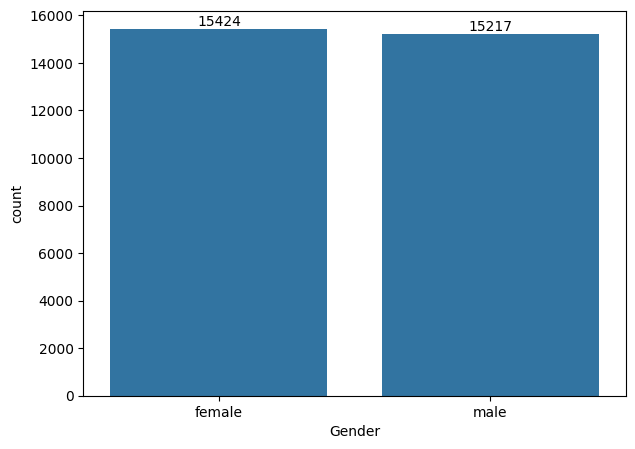

In [39]:
plt.figure(figsize=(7,5))
ax=sns.countplot(df, x='Gender')
ax.bar_label(ax.containers[0])
plt.show()

In [41]:
gb=df.groupby('ParentEduc').agg({'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean'})
gb

,MathScore,ReadingScore,WritingScore
ParentEduc,,,
associate's degree,68.365586,71.124324,70.299099
bachelor's degree,70.466627,73.062020,73.331069
high school,64.435731,67.213997,65.421136
master's degree,72.336134,75.832921,76.356896
some college,66.390472,69.179708,68.501432
some high school,62.584013,65.510785,63.632409


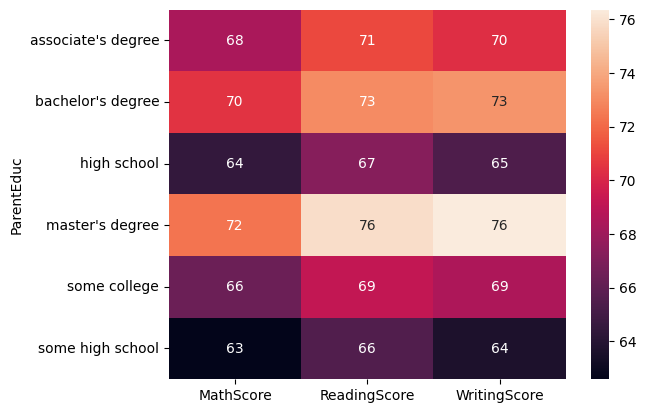

In [44]:
sns.heatmap(gb, annot=True)
plt.show()

In [45]:
gb1=df.groupby('ParentMaritalStatus').agg({'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean'})
gb1

,MathScore,ReadingScore,WritingScore
ParentMaritalStatus,,,
divorced,66.691197,69.655011,68.799146
married,66.657326,69.389575,68.420981
single,66.165704,69.157250,68.174440
widowed,67.368866,69.651438,68.563452


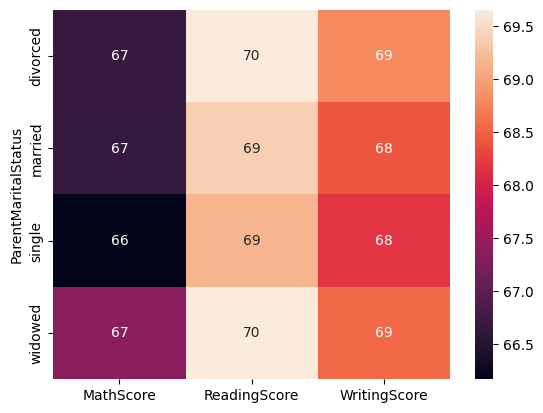

In [46]:
sns.heatmap(gb1, annot=True)
plt.show()

<Axes: xlabel='MathScore'>

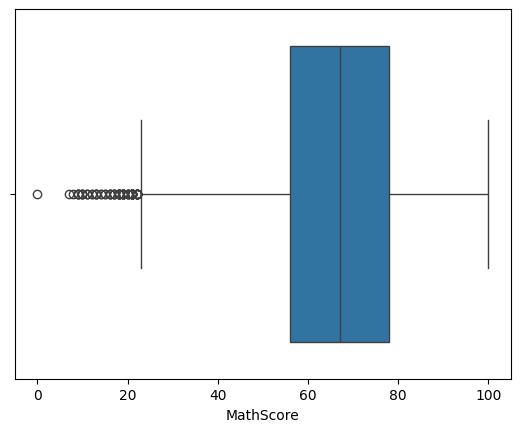

In [50]:
sns.boxplot(df,x='MathScore')



<Axes: xlabel='ReadingScore'>

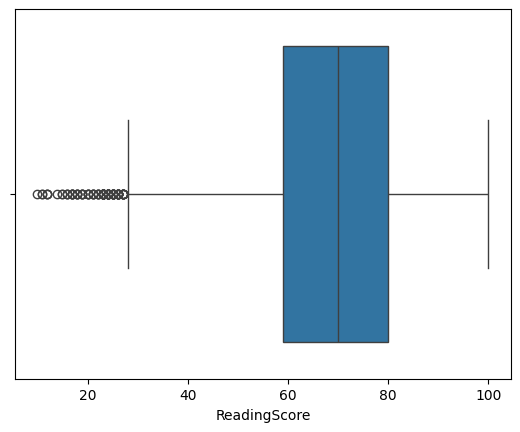

In [51]:
sns.boxplot(df,x='ReadingScore')


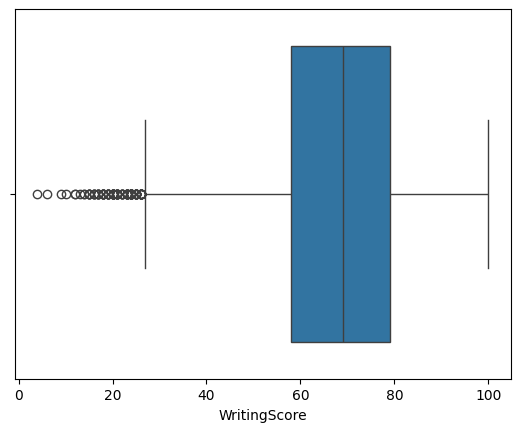

In [52]:
sns.boxplot(df,x='WritingScore')
plt.show()

In [55]:
print(df['EthnicGroup'].unique())

[nan 'group C' 'group B' 'group A' 'group D' 'group E']


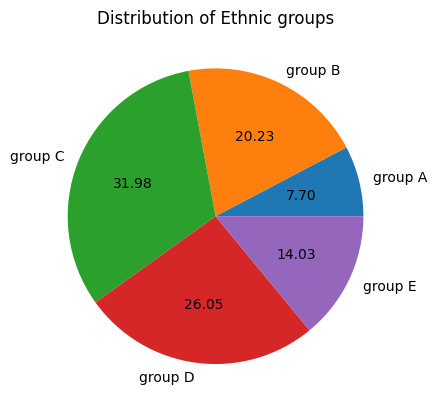

In [68]:
groupA=df.loc[df['EthnicGroup']=='group A']
groupB=df[df['EthnicGroup']=='group B']
groupC=df[df['EthnicGroup']=='group C']
groupD=df[df['EthnicGroup']=='group D']
groupE=df[df['EthnicGroup']=='group E']

plt.title('Distribution of Ethnic groups')
mlist=[len(groupA),len(groupB),len(groupC),len(groupD),len(groupE)]
l=['group A','group B','group C','group D','group E']
plt.pie(mlist, labels=l, autopct='%1.2f')
plt.show()